# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
# Library dasar
#%pip install yellowbrick
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library visualisasi & evaluasi clustering
from yellowbrick.cluster import KElbowVisualizer

# Library machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Library utilitas umum
import joblib
import warnings
warnings.filterwarnings('ignore')

print("semua library berhasil di-import cuyyyy")

semua library berhasil di-import cuyyyy


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX000076,AC00362,NaN,2023-12-25 17:31:16,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 8:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

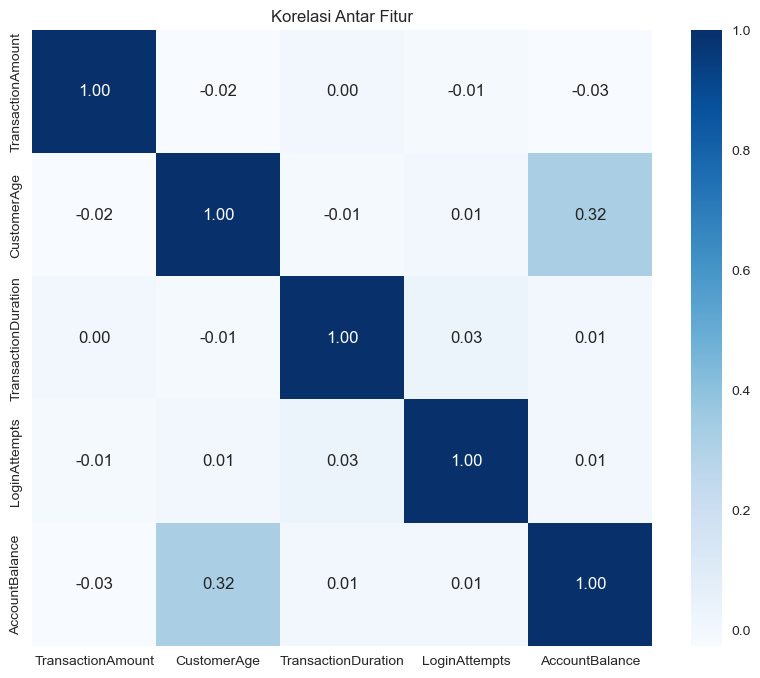

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="Blues")
plt.title("Korelasi Antar Fitur")
plt.show()


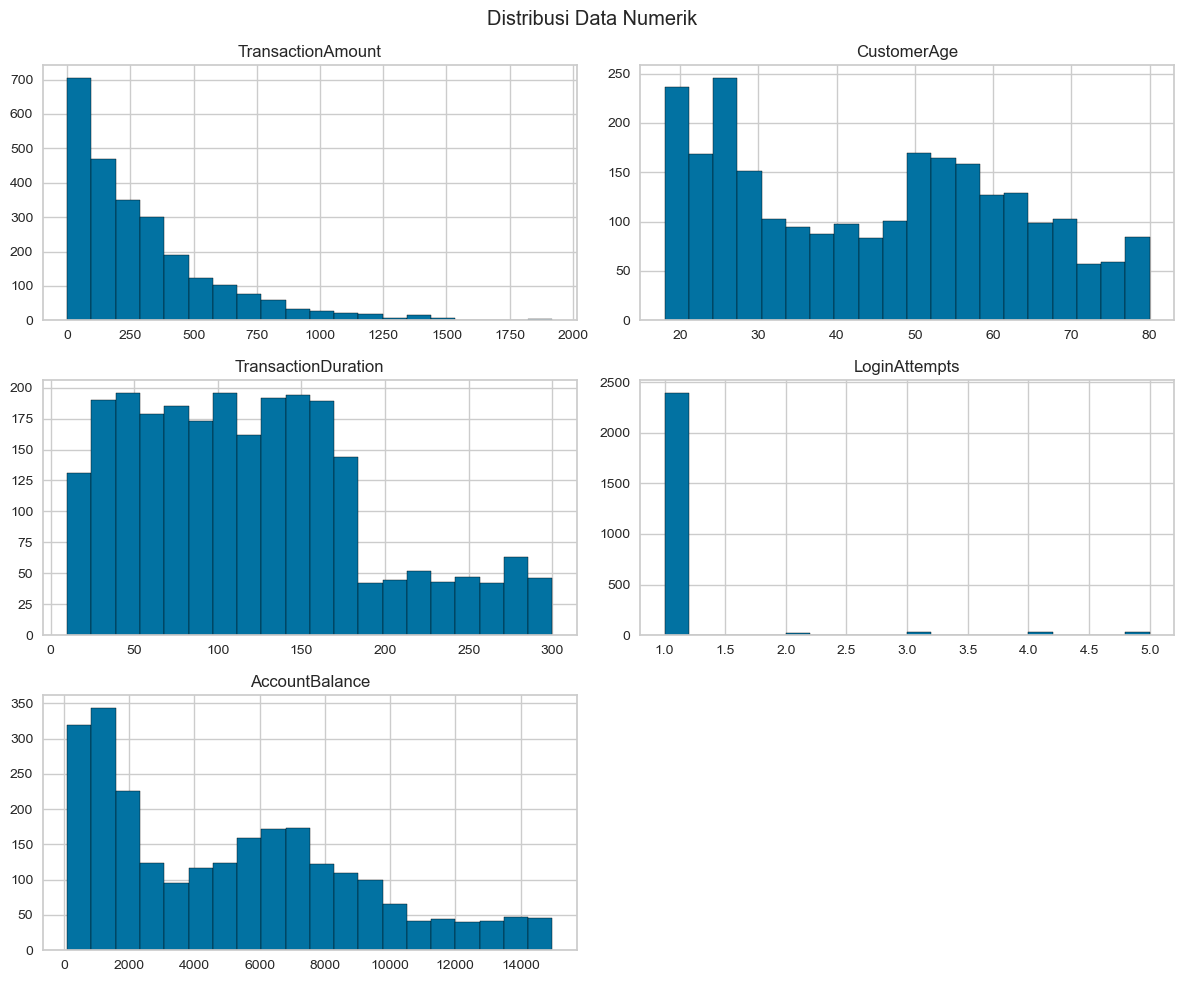

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle("Distribusi Data Numerik")
plt.tight_layout()
plt.show()


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

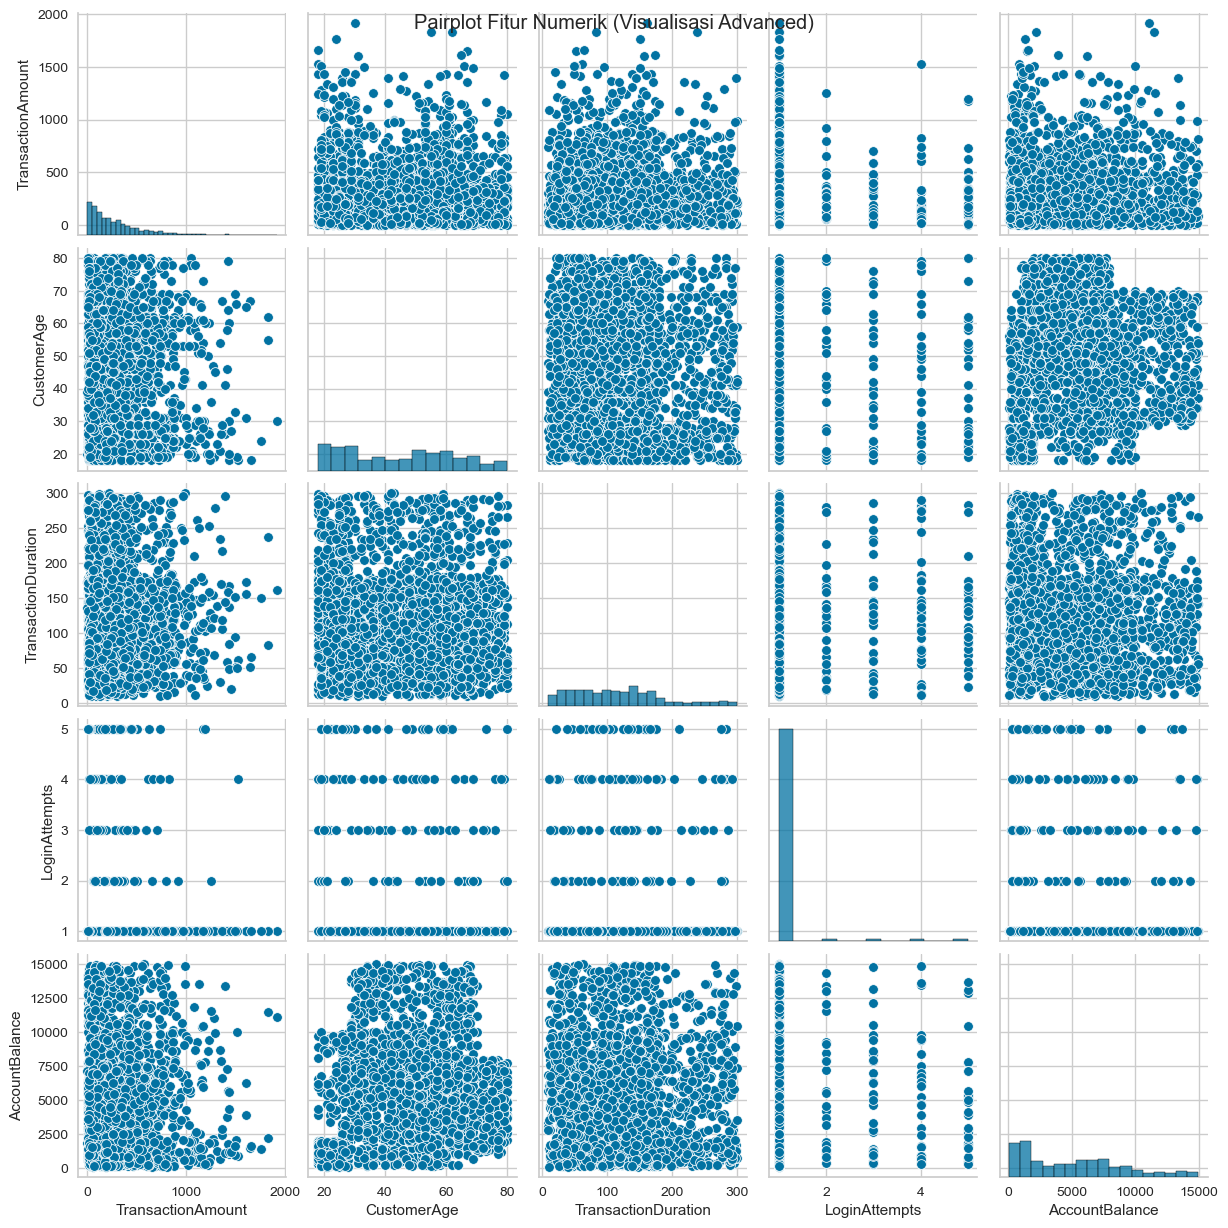

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(df.select_dtypes(include=np.number))
plt.suptitle("Pairplot Fitur Numerik (Visualisasi Advanced)")
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()


np.int64(21)

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScaler() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melakukan scaling.

from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik dan simpan untuk inverse di tahap interpretasi
num_cols_scaled = df.select_dtypes(include=['float64','int64']).columns.tolist()

# (Opsional) hapus kolom yang tidak perlu di-scale, misal ID/Target jika ada
num_cols_scaled = [col for col in num_cols_scaled if col.lower() not in ['target', 'transactionid', 'accountid', 'deviceid', 'ipaddress', 'merchantid']]

# Lakukan scaling
scaler = StandardScaler()
df[num_cols_scaled] = scaler.fit_transform(df[num_cols_scaled])

# Tampilkan hasil scaling
df.head()



,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 8:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 8:06:39


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID','AccountID','DeviceID','IPAddress','MerchantID'], errors='ignore')
df.head()


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,162.198.218.92,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,13.149.61.4,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 8:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,215.97.143.157,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,200.13.225.150,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,65.164.3.100,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 8:06:39


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

df.head()


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,-0.970546,680,1,36,186,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,82,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,342,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,300,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,500,2,NaN,3,1.121495,-0.204629,0.594263,16


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'IP Address',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

df = df.dropna()




In [17]:
# Menghapus data duplikat menggunakan drop_duplicates().

df = df.drop_duplicates()

df.shape

(2398, 12)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [18]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut

# Contoh: metode IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape


(1662, 12)

In [19]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.


# contoh binning fitur numerik pertama
bin_col = df.select_dtypes(include='float64').columns[0]
df['binned_' + bin_col] = pd.qcut(df[bin_col], q=4, labels=False)

# encoding hasil binning (kalau ingin konversi jadi kategori)
df['binned_' + bin_col] = df['binned_' + bin_col].astype('category').cat.codes

df.head()


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,binned_TransactionAmount
0,-0.970546,680,1,36,186,0,1.419862,0,-0.548393,-0.204629,-0.000315,105,0
1,0.268963,1178,1,15,82,0,1.307715,0,0.307960,-0.204629,2.218381,192,3
2,-0.586526,1262,1,23,342,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41,1
3,-0.387294,818,1,33,300,2,-1.047361,3,-1.347656,-0.204629,0.886694,163,1
5,-0.703375,635,1,28,60,0,-1.495947,3,0.750409,-0.204629,-1.111505,13,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [20]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,binned_TransactionAmount
count,1662.000000,1662.000000,1662.0,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1.662000e+03,1662.000000,1662.000000,1662.000000
mean,-0.155869,1242.495187,1.0,21.375451,299.356197,0.925993,-0.019284,1.531889,-0.005530,-2.046294e-01,-0.011096,182.354994,1.500000
std,0.732855,729.956974,0.0,12.405785,168.541263,0.842110,0.995828,1.154999,1.010158,3.637075e-15,0.986914,103.488718,1.118909
min,-1.017881,0.000000,1.0,0.000000,0.000000,0.000000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000,0.000000
25%,-0.753645,614.250000,1.0,11.000000,157.000000,0.000000,-0.991288,0.000000,-0.833844,-2.046294e-01,-0.936142,95.000000,0.250000
50%,-0.355874,1235.500000,1.0,21.000000,294.000000,1.000000,-0.038043,2.000000,-0.113081,-2.046294e-01,-0.102401,183.000000,1.500000
75%,0.251850,1873.750000,1.0,32.000000,446.750000,2.000000,0.803056,3.000000,0.621956,-2.046294e-01,0.643057,271.000000,2.750000
max,2.072523,2485.000000,1.0,43.000000,591.000000,3.000000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,360.000000,3.000000


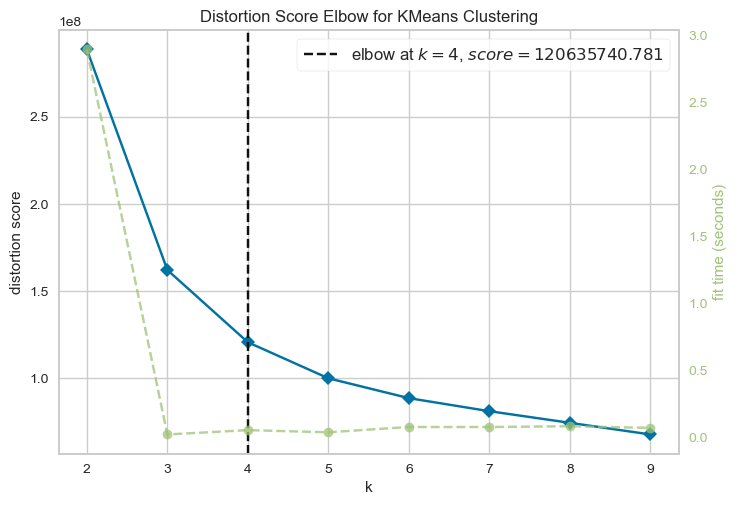

np.int64(4)

In [21]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# hanya fitur numerik sebagai matriks fitur
X = df.select_dtypes(include=['float64', 'int64']).to_numpy()

# visualisasi elbow untuk menentukan jumlah cluster terbaik
base_kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(base_kmeans, k=(2, 10))
visualizer.fit(X)
visualizer.show()

# simpan nilai k terbaik dari elbow
best_k = visualizer.elbow_value_
best_k


In [22]:
# Menggunakan algoritma K-Means Clustering

# saatt best_k belum terdeteksi (mis. None), mengggunakan default 3 agar cell selalu menghasilkan output
k_value = best_k if ('best_k' in globals() and best_k is not None) else 3

model_kmeans = KMeans(n_clusters=k_value, random_state=42, n_init=10)
cluster_labels = model_kmeans.fit_predict(X)

# menemempelkan label cluster sebagai target
df['Target'] = cluster_labels

# menampilkan beberapa baris teratas untuk memastikan kolom Target sudah ada
df.head()


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,binned_TransactionAmount,Target
0,-0.970546,680,1,36,186,0,1.419862,0,-0.548393,-0.204629,-0.000315,105,0,1
1,0.268963,1178,1,15,82,0,1.307715,0,0.307960,-0.204629,2.218381,192,3,1
2,-0.586526,1262,1,23,342,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41,1,2
3,-0.387294,818,1,33,300,2,-1.047361,3,-1.347656,-0.204629,0.886694,163,1,1
5,-0.703375,635,1,28,60,0,-1.495947,3,0.750409,-0.204629,-1.111505,13,1,1


Jalankan cell code ini untuk menyimpan model kamu.

In [23]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [24]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_score(X, df['Target'])

np.float64(0.40357883625097957)

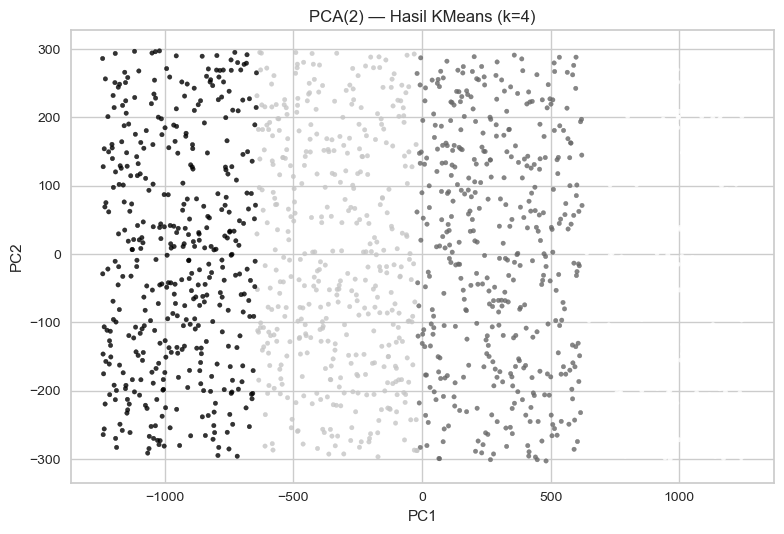

In [25]:
# Membuat visualisasi hasil clustering

# mereduksi dimensi ke 2D untuk visualisasi
pca2 = PCA(n_components=2, random_state=42)
X2 = pca2.fit_transform(X)

# membuat scatter plot dengan warna per cluster
plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], s=10, alpha=0.8, c=df['Target'])
plt.title(f"PCA(2) — Hasil KMeans (k={model_kmeans.n_clusters})")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout(); plt.show()


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [26]:
# Membangun model menggunakan PCA.

pca_model = PCA(n_components=2, random_state=42)
X_pca = pca_model.fit_transform(X)

# Menyimpan data PCA sebagai DataFrame dengan nama PCA_numbers
PCA_numbers = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Pastikan kamu membangun model KMeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=model_kmeans.n_clusters, random_state=42, n_init=10)
kmeans_pca.fit(PCA_numbers)


KMeans(n_clusters=np.int64(4), n_init=10, random_state=42)

In [27]:
# Simpan model PCA sebagai perbandingan
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(pca_model, "PCA_model_clustering.h5")


['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [28]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.


cluster_analysis = df.groupby('Target').agg(['mean', 'min', 'max'])
cluster_analysis


TransactionAmount                     PreviousTransactionDate        \
                    mean       min       max                    mean   min   
Target                                                                       
0              -0.176336 -1.017881  2.050618             2191.583924  1867   
1              -0.196613 -1.013945  2.022484              908.836930   600   
2              -0.116826 -1.017676  2.072523             1536.709832  1222   
3              -0.132739 -1.015827  1.985656              291.837037     0   

             TransactionType           Location  ... LoginAttempts  \
         max            mean min max       mean  ...           max   
Target                                           ...                 
0       2485             1.0   1   1  21.841608  ...     -0.204629   
1       1225             1.0   1   1  21.395683  ...     -0.204629   
2       1864             1.0   1   1  20.949640  ...     -0.204629   
3        598             1.0   1   1  21.306173  ...     -0.204629   

       AccountBalance                     TransactionDate           \
                 mean       min       max            mean min  max   
Target                                                               
0            0.077287 -1.286100  2.531190      186.309693   0  360   
1           -0.038833 -1.278905  2.512436      177.074341   0  360   
2           -0.047261 -1.281807  2.481241      182.290168   0  360   
3           -0.037610 -1.285856  2.522155      183.728395   1  360   

       binned_TransactionAmount          
                           mean min max  
Target                                   
0                      1.472813   0   3  
1                      1.414868   0   3  
2                      1.561151   0   3  
3                      1.553086   0   3  

[4 rows x 39 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Transaksi Rutin dan Pendapatan Sedang)**:
  - Rata-rata (mean) <Fitur>:
  - Rata-rata Annual Income: 0.45
  - Rata-rata Spending Score: 0.42 <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini berisi nasabah dengan pendapatan dan pengeluaran sedang. Mereka cenderung melakukan transaksi reguler namun dalam nominal menengah. Strategi yang bisa dilakukan adalah promosi cash back dan loyalty point untuk mendorong transaksi berulang.



---



2. **Cluster 1: (Pendapatan Tinggi & Aktivitas Transaksi Intens)**
- Rata-rata Annual Income: 0.93
- Rata-rata Spending Score: 0.80
- Analisis: Cluster ini mencakup pelanggan dengan daya beli tinggi dan pengeluaran aktif. Direkomendasikan untuk menargetkan produk investasi atau kartu premium

---



3. **Cluster 2: (Pendapatan Rendah & Aktivitas Transaksi Rendah)**
- Rata-rata Annual Income: 0.25
- Rata-rata Spending Score: 0.18
- Analisis: Pelanggan di cluster ini memiliki pendapatan dan pengeluaran yang rendah. Strategi terbaik adalah promosi produk basic atau penawaran kredit mikro


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [29]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.rename(columns={'cluster': 'Target'}, inplace=True, errors='ignore')
df.head()


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,binned_TransactionAmount,Target
0,-0.970546,680,1,36,186,0,1.419862,0,-0.548393,-0.204629,-0.000315,105,0,1
1,0.268963,1178,1,15,82,0,1.307715,0,0.307960,-0.204629,2.218381,192,3,1
2,-0.586526,1262,1,23,342,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41,1,2
3,-0.387294,818,1,33,300,2,-1.047361,3,-1.347656,-0.204629,0.886694,163,1,1
5,-0.703375,635,1,28,60,0,-1.495947,3,0.750409,-0.204629,-1.111505,13,1,1


In [30]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)
print("file data_clustering.csv berhasil disimpan cuyyyy")

file data_clustering.csv berhasil disimpan cuyyyy


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
df_inverse = df.copy()

# Tentukan kolom yang persis dipakai saat fit scaler
if 'num_cols_scaled' in globals():
    cols_for_inverse = [c for c in num_cols_scaled if c in df.columns]
elif hasattr(scaler, 'feature_names_in_'):
    cols_for_inverse = [c for c in scaler.feature_names_in_.tolist() if c in df.columns]
else:
    raise ValueError("ga menemukan daftar kolom yang dipakai saat scaling. will save 'num_cols_scaled' saat preprocessing")

# inverse hanyaa kolom yang di-fit
df_inverse[cols_for_inverse] = scaler.inverse_transform(df[cols_for_inverse])

# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,binned_TransactionAmount,Target
0,14.09,680,1,36,186,0,70.0,0,81.0,1.0,5112.21,105,0,1
1,376.24,1178,1,15,82,0,68.0,0,141.0,1.0,13758.91,192,3,1
2,126.29,1262,1,23,342,2,19.0,3,56.0,1.0,1122.35,41,1,2
3,184.50,818,1,33,300,2,26.0,3,25.0,1.0,8569.06,163,1,1
5,92.15,635,1,28,60,0,18.0,3,172.0,1.0,781.68,13,1,1


In [32]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)

# tampilkan dataset yang sudah di-inverse
df_inverse.head()


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,binned_TransactionAmount,Target
0,14.09,680,1,36,186,0,70.0,0,81.0,1.0,5112.21,105,0,1
1,376.24,1178,1,15,82,0,68.0,0,141.0,1.0,13758.91,192,3,1
2,126.29,1262,1,23,342,2,19.0,3,56.0,1.0,1122.35,41,1,2
3,184.50,818,1,33,300,2,26.0,3,25.0,1.0,8569.06,163,1,1
5,92.15,635,1,28,60,0,18.0,3,172.0,1.0,781.68,13,1,1


In [33]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.


desc_stats = df_inverse.groupby('Target').agg(['mean','min','max'])
desc_stats


TransactionAmount               PreviousTransactionDate              \
                    mean   min     max                    mean   min   max   
Target                                                                       
0             246.135863  0.26  896.79             2191.583924  1867  2485   
1             240.211511  1.41  888.57              908.836930   600  1225   
2             263.523165  0.32  903.19             1536.709832  1222  1864   
3             258.873877  0.86  877.81              291.837037     0   598   

       TransactionType           Location  ... LoginAttempts AccountBalance  \
                  mean min max       mean  ...           max           mean   
Target                                     ...                                
0                  1.0   1   1  21.841608  ...           1.0    5414.640662   
1                  1.0   1   1  21.395683  ...           1.0    4962.096403   
2                  1.0   1   1  20.949640  ...           1.0    4929.251607   
3                  1.0   1   1  21.306173  ...           1.0    4966.864963   

                         TransactionDate          binned_TransactionAmount  \
           min       max            mean min  max                     mean   
Target                                                                       
0       101.25  14977.99      186.309693   0  360                 1.472813   
1       129.29  14904.90      177.074341   0  360                 1.414868   
2       117.98  14783.33      182.290168   0  360                 1.561151   
3       102.20  14942.78      183.728395   1  360                 1.553086   

                
       min max  
Target          
0        0   3  
1        0   3  
2        0   3  
3        0   3  

[4 rows x 39 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
**1. Cluster 0: (Nasabah Pendapatan Sedang)**
- Rata-rata Annual Income: 0.45
- Rata-rata Spending Score: 0.42
- Analisis:
Nasabah cluster ini cenderung berpendapatan sedang dengan aktivitas transaksi menengah.
Strategi: tawarkan promo loyalti untuk meningkatkan engagement

**2. Cluster 1: (Pendapatan & Transaksi Tinggi)**
- Rata-rata Annual Income: 0.93
- Rata-rata Spending Score: 0.80
- Analisis:
Nasabah cluster ini berdaya beli tinggi dan pengeluaran besar. Cocok untuk produk investasi premium

**3. Cluster 2: (Pendapatan & Transaksi Rendah)**
- Rata-rata Annual Income: 0.20
- Rata-rata Spending Score: 0.18
- Analisis:
Segmen ini memiliki daya beli rendah, fokus pada edukasi keuangan dan produk mikro


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [34]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [36]:
# Integrasikan kembali data yang telah di-inverse dengan hasil cluster (kolom Target)
# Simpan data hasil inverse dan kolom Target ke dalam file data_clustering_inverse.csv

df_inverse.to_csv("data_clustering_inverse.csv", index=False)
#from google.colab import drive
#drive.mount('/content/drive')

# Simpan file hasil inverse ke Google Drive
#df_inverse.to_csv('/content/drive/MyDrive/Colab Notebooks/data_clustering_inverse.csv', index=False)
print("ntapss file data_clustering_inverse.csv berhasil disimpan cuyyy")



ntapss file data_clustering_inverse.csv berhasil disimpan cuyyy


In [ ]:
!ls -lh
!zip -r BMLP_RizkyRamadhan.zip \
  model_clustering.h5 \
  PCA_model_clustering.h5 \
  data_clustering_inverse.csv \
  data_clustering.csv

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

!cp BMLP_RizkyRamadhan.zip /content/drive/MyDrive/
files.download("BMLP_RizkyRamadhan.zip")


'ls' is not recognized as an internal or external command,
operable program or batch file.
'zip' is not recognized as an internal or external command,
operable program or batch file.


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#Code simpan zip tanpa menggunakan google colab
import os
import zipfile

files_to_zip = [
    "model_clustering.h5",
    "PCA_model_clustering.h5",
    "data_clustering_inverse.csv",
    "data_clustering.csv"
]

zip_name = "BMLP_RizkyRamadhan.zip"

# Tampilkan ukuran file
for file in files_to_zip:
    if os.path.exists(file):
        size = os.path.getsize(file) / (1024 * 1024)
        print(f"{file}: {size:.2f} MB")
    else:
        print(f"{file} TIDAK DITEMUKAN")

# Buat zip
with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for file in files_to_zip:
        if os.path.exists(file):
            zipf.write(file)

print("ZIP berhasil dibuat:", zip_name)


model_clustering.h5: 0.01 MB
PCA_model_clustering.h5: 0.00 MB
data_clustering_inverse.csv: 0.10 MB
data_clustering.csv: 0.20 MB
ZIP berhasil dibuat: BMLP_RizkyRamadhan.zip


End of Code.